   Gender   Age Height Weight family_history_with_overweight FAVC FCVC  NCP  \
0  Female  21.0   1.62   64.0                            yes   no  2.0  3.0   
1  Female  21.0   1.52   56.0                            yes   no  3.0  3.0   
2    Male  23.0    1.8   77.0                            yes   no  2.0  3.0   
3    Male  27.0    1.8   87.0                             no   no  3.0  3.0   
4    Male  22.0   1.78   89.8                             no   no  2.0  1.0   

        CAEC SMOKE CH2O  SCC    FAF    TUE        CALC                 MTRANS  \
0  Sometimes    no  2.0   no    0.0    1.0         NO   Public_Transportation   
1  Sometimes   yes  3.0  yes   3.0    0.0    Sometimes  Public_Transportation   
2  Sometimes    no  2.0   no    2.0    1.0  Frequently  Public_Transportation   
3  Sometimes    no  2.0   no    2.0    0.0  Frequently                Walking   
4  Sometimes    no  2.0   no   0.0    0.0    Sometimes  Public_Transportation   

             NObeyesdad mixed_type_col

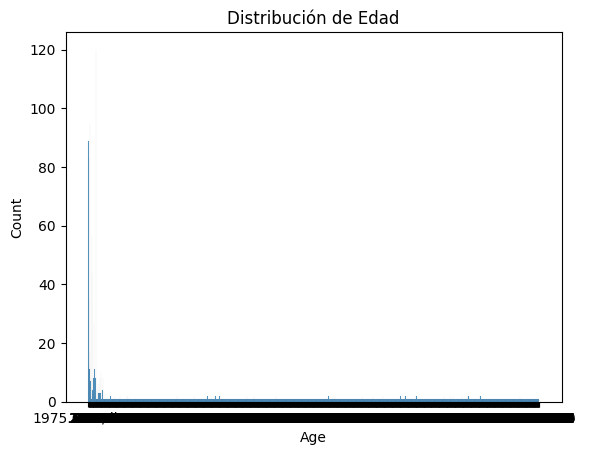

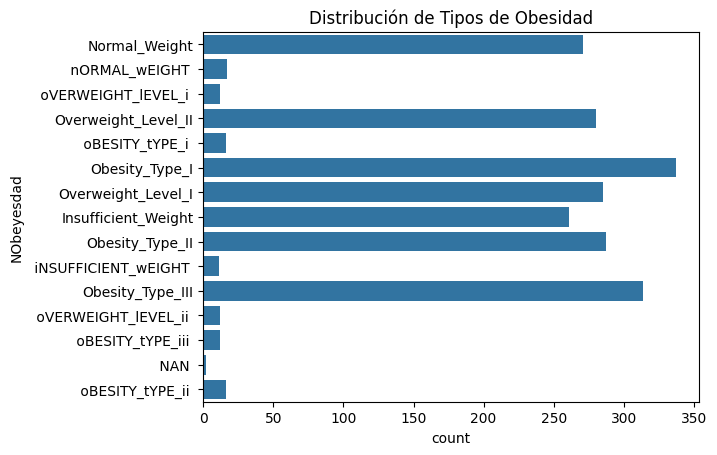

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_csv('../data/raw/obesity_estimation_modified.csv', dtype = None)

# Vistazo inicial
print(df.head())
print(df.info())
print(df.describe())

# Revisar valores nulos
print(df.isnull().sum())

# Visualizaciones
# Histograma de Edad
sns.histplot(df['Age'])
plt.title('Distribución de Edad')
plt.show()

# Conteo de la variable objetivo 'NObeyesdad'
sns.countplot(y='NObeyesdad', data=df)
plt.title('Distribución de Tipos de Obesidad')
plt.show()

### Data Preparation

First let's see how our data behaves. Dataset contains both numerical and categorical data. 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2153 entries, 0 to 2152
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Gender                          2135 non-null   object
 1   Age                             2126 non-null   object
 2   Height                          2125 non-null   object
 3   Weight                          2137 non-null   object
 4   family_history_with_overweight  2133 non-null   object
 5   FAVC                            2137 non-null   object
 6   FCVC                            2136 non-null   object
 7   NCP                             2129 non-null   object
 8   CAEC                            2131 non-null   object
 9   SMOKE                           2134 non-null   object
 10  CH2O                            2124 non-null   object
 11  SCC                             2138 non-null   object
 12  FAF                             2124 non-null   

As we can see, most of the *nan* values represent less than 2% of the data. So it is safe to removed them.

In [3]:
df = df.dropna(how='any', axis = 0)
df.isna().sum()/len(df) *100

Gender                            0.0
Age                               0.0
Height                            0.0
Weight                            0.0
family_history_with_overweight    0.0
FAVC                              0.0
FCVC                              0.0
NCP                               0.0
CAEC                              0.0
SMOKE                             0.0
CH2O                              0.0
SCC                               0.0
FAF                               0.0
TUE                               0.0
CALC                              0.0
MTRANS                            0.0
NObeyesdad                        0.0
mixed_type_col                    0.0
dtype: float64

Let's transform these variables into their correct type.

In [4]:
# Definir el tipo correcto para cada columna
column_types = {
    # Numéricas continuas (float)
    'Height': float,
    'Weight': float,
    'FCVC': float,
    'CH2O': float,
    'FAF': float,
    'TUE': float,
    
    # Numéricas enteras (int)
    'Age': int,
    'NCP': int,
    
    # Categóricas (string)
    'Gender': str,
    'family_history_with_overweight': str,
    'FAVC': str,
    'CAEC': str,
    'SMOKE': str,
    'SCC': str,
    'CALC': str,
    'MTRANS': str,
    'NObeyesdad': str
}

# Aplicar conversiones con manejo de errores
for col, dtype in column_types.items():
    try:
        if dtype in [int, float]:
            # Para numéricos: primero a float, luego a int si aplica
            df[col] = pd.to_numeric(df[col], errors='coerce')
            if dtype == int:
                # Eliminar NaN antes de convertir a int
                df[col] = df[col].dropna().astype(int)
        else:
            # Para categóricos: asegurar que sea string
            df[col] = df[col].astype(str)
    except Exception as e:
        print(f"Error convirtiendo {col}: {e}")

In [5]:
df.describe(exclude= 'number')

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,mixed_type_col
count,1594,1594,1594,1594,1594,1594,1594,1594,1594,1594
unique,4,5,4,8,5,4,7,9,15,724
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I,unknown
freq,768,1238,1362,1259,1488,1444,1000,1127,258,194


We noticed there are several unique values in this categorical values because of typing mistakes. So we will lowercase everything and remove blank spaces within values.

In [6]:
df = df.apply(lambda col: col.str.lower() if col.dtype == "object" else col)
df = df.apply(lambda col: col.str.strip() if col.dtype == "object" else col)

We have a peculiar case where some values are literally 'nan' as a string. So we will remove them as well.

In [7]:
df = df[~df.apply(lambda row: row.astype(str).str.contains('nan', case=False, na=False)).any(axis=1)]

__mixed_type_col__ does not really adds relevant information to the dataset. Since it is a combination of meaningless discrete and categorical values, we proceed to remove.

In [8]:
df = df.drop('mixed_type_col', axis=1 )

Now we have the cleaning section ready. Let's take a look before we move on.

In [9]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,female,21.0,1.62,64.0,yes,no,2.0,3.0,sometimes,no,2.0,no,0.0,1.0,no,public_transportation,normal_weight
2,male,23.0,1.80,77.0,yes,no,2.0,3.0,sometimes,no,2.0,no,2.0,1.0,frequently,public_transportation,normal_weight
3,male,27.0,1.80,87.0,no,no,3.0,3.0,sometimes,no,2.0,no,2.0,0.0,frequently,walking,overweight_level_i
4,male,22.0,1.78,89.8,no,no,2.0,1.0,sometimes,no,2.0,no,0.0,0.0,sometimes,public_transportation,overweight_level_ii
5,male,29.0,1.62,53.0,no,yes,2.0,3.0,sometimes,no,2.0,no,0.0,0.0,sometimes,automobile,normal_weight


In [ ]:
df.to_csv(r"..\data\raw\obesity_estimation_final.csv", index=False)

: 